In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout,Flatten,Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
from zipfile import ZipFile
import os
import matplotlib.image as mpimg

# Unzipping the Dataset

In [5]:
data_path="archive (40).zip"
with ZipFile(data_path,"r") as zip:
    zip.extractall()
    print("the data set has been extracted,")


the data set has been extracted,


In [7]:
path="dog-vs-cat"
classes=os.listdir(path)
classes

['cat', 'dog']

# Visualizing the Dataset

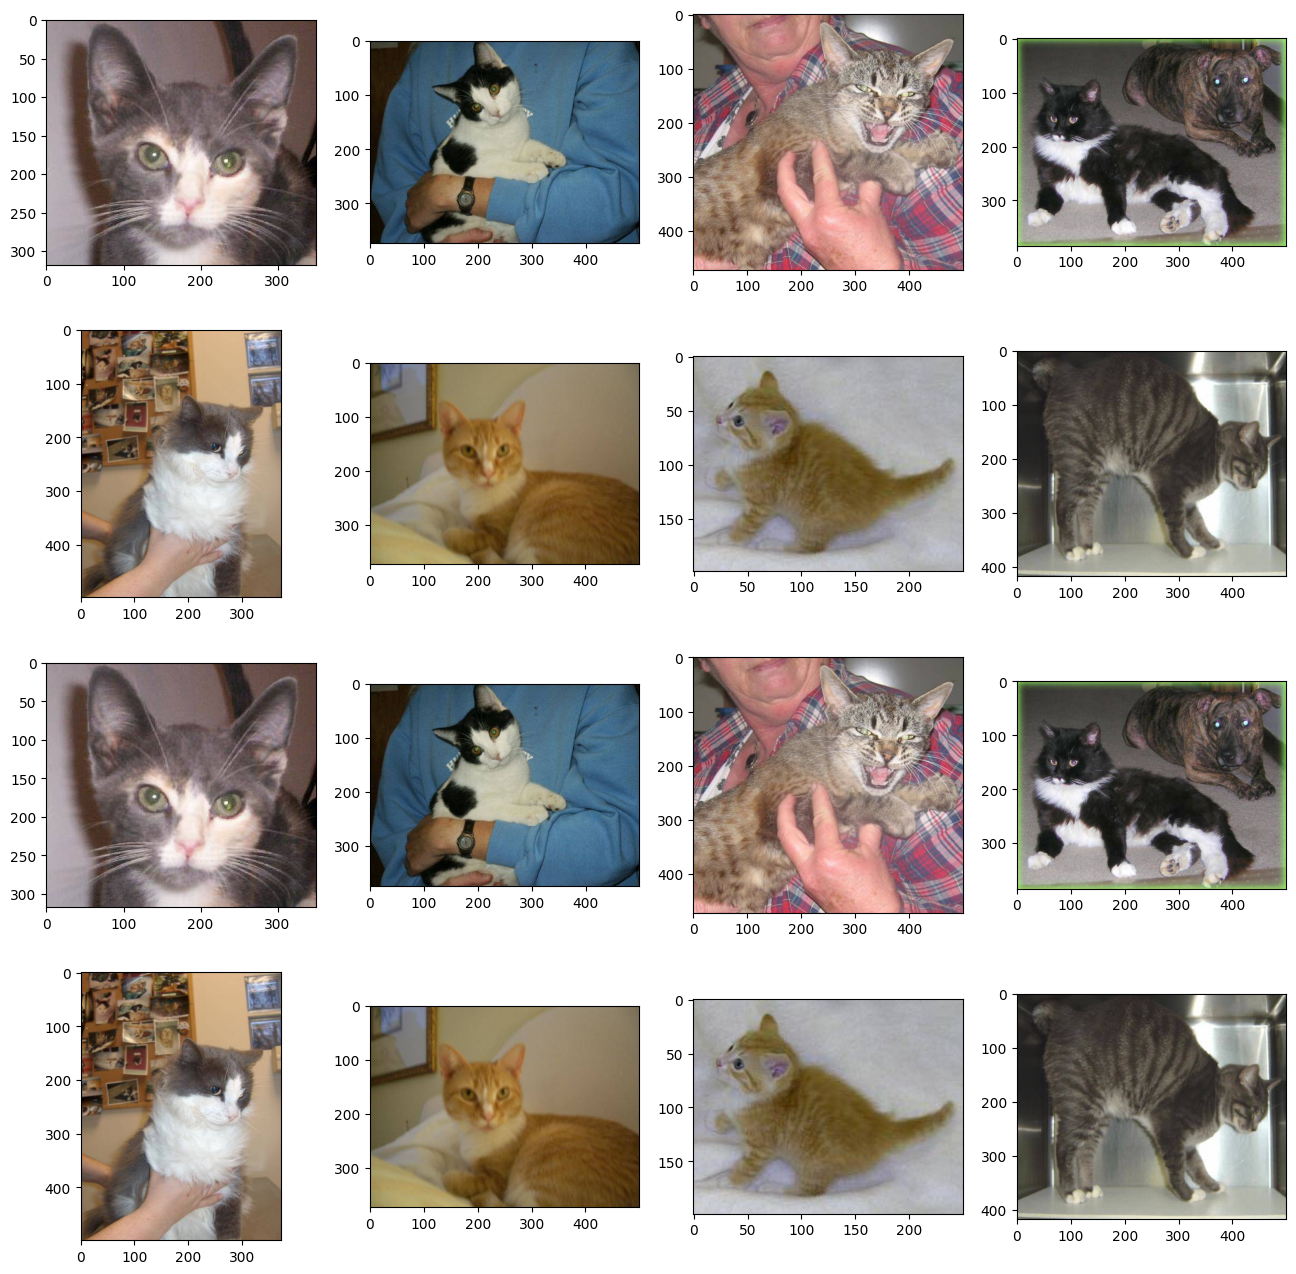

In [10]:
plt.figure(figsize=(16,16))
cat_dir=os.path.join("dog-vs-cat/cat")
dog_dir=os.path.join("dog-vs-cat/cat")
cat_names=os.listdir(cat_dir)
dog_names=os.listdir(dog_dir)
pic_index=210
cat_images=[os.path.join(cat_dir,fname)
            for fname in cat_names[pic_index-8:pic_index]]
dog_images=[os.path.join(dog_dir,fname)
            for fname in dog_names[pic_index-8:pic_index]]
all_images=cat_images+dog_images
i=0
for img_path in all_images:
    sp=plt.subplot(4,4,i+1)
    img=mpimg.imread(img_path)
    plt.imshow(img)
    i+=1
plt.show()




# Creating Training and Testing Datasets

In [11]:
base_dir="dog-vs-cat"
train_datagen=image_dataset_from_directory(base_dir,
                                           image_size=(200,200),
                                           subset="training",
                                           seed=1,
                                           validation_split=0.1,
                                           batch_size=32)
test_datagen=image_dataset_from_directory(base_dir,
                                           image_size=(200,200),
                                           subset="validation",
                                           seed=1,
                                           validation_split=0.1,
                                           batch_size=32)


Found 25000 files belonging to 2 classes.
Using 22500 files for training.
Found 25000 files belonging to 2 classes.
Using 2500 files for validation.


# Building the CNN Model

In [15]:
model=tf.keras.models.Sequential([
    layers.Conv2D(32,(3,3), activation="relu",input_shape=(200,200,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(512,activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(512,activation="relu"),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(512,activation="relu"),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(1,activation="sigmoid")
])
    
    
    
    

# Model Summary and Visualization

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 46, 46, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 21, 21, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,902,529 (14.89 MB)

 Trainable params: 3,899,457 (14.88 MB)

 Non-trainable params: 3,072 (12.00 KB)

# Compiling and Training the Model

In [17]:
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [18]:
history=model.fit(train_datagen,
                  epochs=10,
                  validation_data=test_datagen)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 580s 811ms/step - accuracy: 0.5906 - loss: 0.7441 - val_accuracy: 0.7384 - val_loss: 0.5558
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 72840s 104s/step - accuracy: 0.7398 - loss: 0.5334 - val_accuracy: 0.4856 - val_loss: 1.1611
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 541s 768ms/step - accuracy: 0.7212 - loss: 0.5542 - val_accuracy: 0.5008 - val_loss: 0.8018
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 539s 765ms/step - accuracy: 0.6142 - loss: 0.6530 - val_accuracy: 0.5532 - val_loss: 0.6935
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 579s 822ms/step - accuracy: 0.7086 - loss: 0.5618 - val_accuracy: 0.7732 - val_loss: 0.4808
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 527s 749ms/step - accuracy: 0.7875 - loss: 0.4575 - val_accuracy: 0.6972 - val_loss: 1.3803
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 529s 751ms/step - accuracy: 0.8172 - loss: 0.3959 - val_accuracy: 0.5020 - val_loss: 1.2144
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 523s 743ms/step - accuracy: 0.7583 

# Testing with aNew Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step
[[0.02903553]]
cat


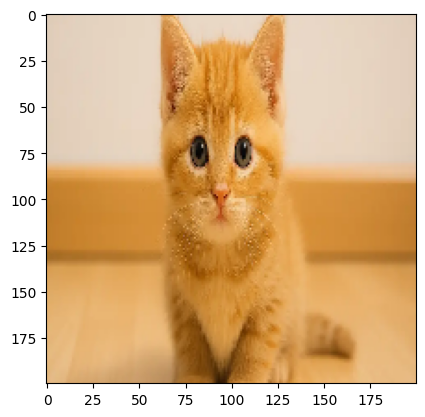

In [21]:
from keras.preprocessing import image
test_image=image.load_img("cat6-1744094950340-e44df3c1-dcf7-4164-8199-1182c8d838df-900x506.png",target_size=(200,200))
plt.imshow(test_image)
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(result)
i=0
if(result>=0.5):
    print("Dog")
else:
    print("cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
[[0.02903553]]
cat


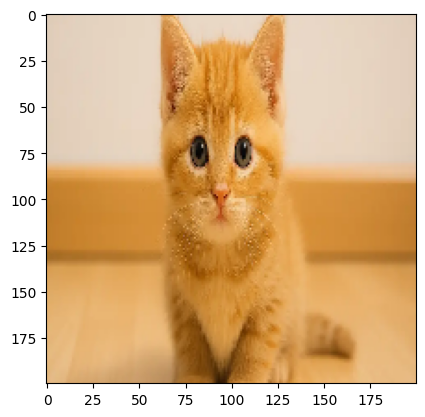

In [23]:
from keras.preprocessing import image
test_image=image.load_img("cat6-1744094950340-e44df3c1-dcf7-4164-8199-1182c8d838df-900x506.png",target_size=(200,200))
plt.imshow(test_image)
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(result)
i=0
if(result>=0.5):
    print("Dog")
else:
    print("cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
Dog


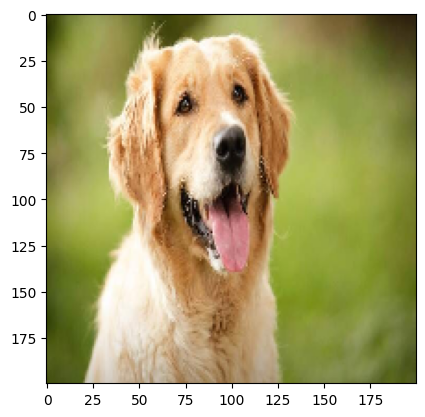

In [27]:
test_image=image.load_img("golden-retriever-tongue-out.jpg",target_size=(200,200))
plt.imshow(test_image)
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
i=0
if(result>=0.5):
    print("Dog")
else:
    print("cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
[[0.02903553]]
cat


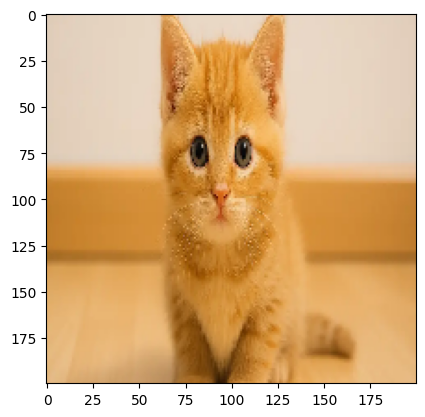

In [28]:
from keras.preprocessing import image
test_image=image.load_img("cat6-1744094950340-e44df3c1-dcf7-4164-8199-1182c8d838df-900x506.png",target_size=(200,200))
plt.imshow(test_image)
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(result)
i=0
if(result>=0.5):
    print("Dog")
else:
    print("cat")